In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.shape

(200, 5)

In [4]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [5]:
df.rename(columns={'CustomerID':'id','Gender':'gender','Age':'age','Annual Income (k$)':'income',
            'Spending Score (1-100)':'spending_score'},inplace=True)

In [6]:
df.drop(['id'],inplace=True,axis=1)

In [7]:
df.head()

,gender,age,income,spending_score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


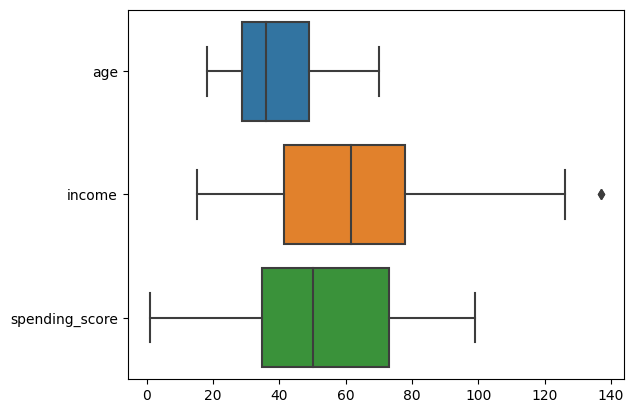

In [8]:
sns.boxplot(data=df,orient='h')
plt.show()

##### the annual income is given in thousands.So,let's multiply them with 1000,already we are gonna scale them because of the distance

In [9]:
df.income = df.income * 1000

In [10]:
df.head()

,gender,age,income,spending_score
0,Male,19,15000,39
1,Male,21,15000,81
2,Female,20,16000,6
3,Female,23,16000,77
4,Female,31,17000,40


In [11]:
from sklearn.preprocessing import RobustScaler

In [12]:
rs = RobustScaler()

In [13]:
df[['income','spending_score']] = rs.fit_transform(df[['income','spending_score']])

In [14]:
df.head()

,gender,age,income,spending_score
0,Male,19,-1.273973,-0.287582
1,Male,21,-1.273973,0.810458
2,Female,20,-1.246575,-1.150327
3,Female,23,-1.246575,0.705882
4,Female,31,-1.219178,-0.261438


#### let's do clustering by income and spending_score

In [15]:
X = df.iloc[:,2:4]

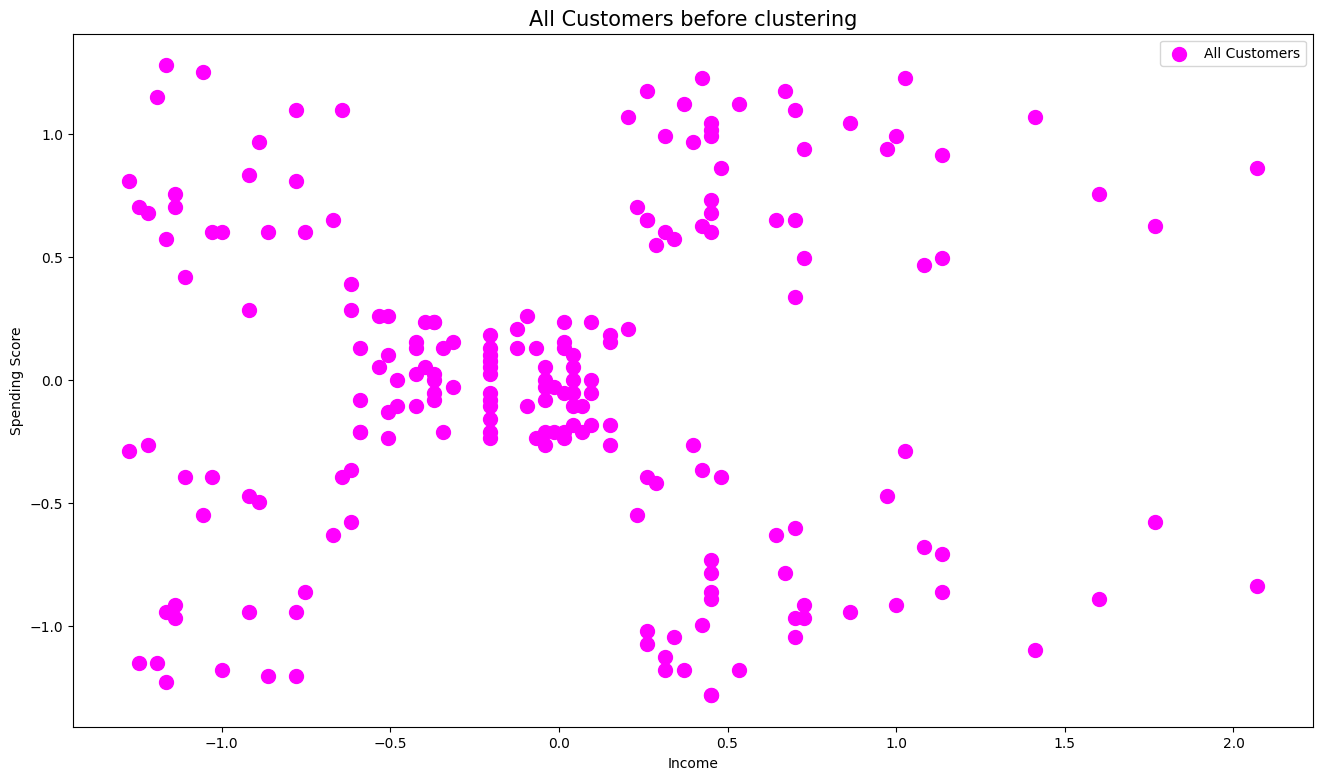

In [16]:
plt.figure(figsize=(16,9))
plt.scatter(X.iloc[:,0],X.iloc[:,1],s=100,color='magenta',label='All Customers')
plt.title('All Customers before clustering',loc='center',fontsize=15)
plt.xlabel('Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

# Let's clustering with k_means

## There are 2 methods:

##### 1.Elbow method
##### 2.Silhouete method

In [17]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans

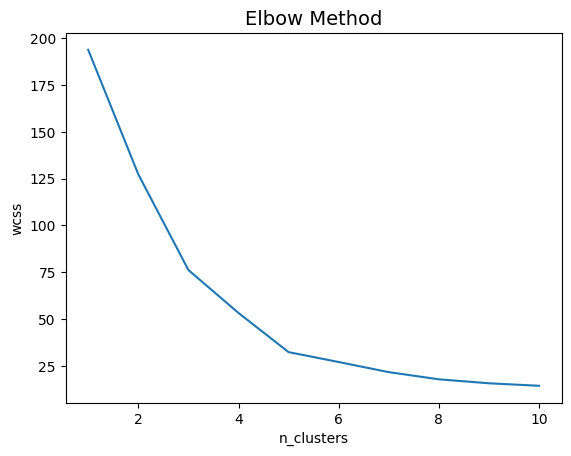

In [18]:
wcss = []

for k in range(1,11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method',fontsize=14)
plt.ylabel('wcss')
plt.xlabel('n_clusters')
plt.show()

In [19]:
from sklearn.metrics import silhouette_score

In [20]:
avg_silhouete_score = []
for k in range(2,10):
    clusterer = KMeans(n_clusters=k,random_state=42)
    clusterer_lables = clusterer.fit_predict(X)
    silhouete_avg = silhouette_score(X,clusterer_lables)
    print(f"For n_clusters:{k},The average silhouete score is {silhouete_avg}")

For n_clusters:2,The average silhouete score is 0.3068335124586998
For n_clusters:3,The average silhouete score is 0.47029393594847796
For n_clusters:4,The average silhouete score is 0.4909840957730004
For n_clusters:5,The average silhouete score is 0.5516518249155914
For n_clusters:6,The average silhouete score is 0.5390883548184418
For n_clusters:7,The average silhouete score is 0.5301862669710272
For n_clusters:8,The average silhouete score is 0.4623584985061324
For n_clusters:9,The average silhouete score is 0.4597107011645711


# the number of cluster must be 5,we can se that easly from the silhouete method

In [21]:
clusterer = KMeans(n_clusters=5,random_state=42)
clusterer_labels = clusterer.fit_predict(X)

In [51]:
centroids = clusterer.cluster_centers_
centroids

array([[ 0.73150685, -0.85975724],
       [-0.16996449, -0.01258775],
       [ 0.68598525,  0.83995308],
       [-0.96426444, -0.76044331],
       [-0.98007472,  0.76767677]])

In [50]:
income_centers = clusterer.cluster_centers_[:,1]
spending_score_centers = clusterer.cluster_centers_[:,0]

In [23]:
clusterer_labels

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 1,
       3, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

In [25]:
type(X)

pandas.core.frame.DataFrame

### The type of X(our data that we try to cluster) is pandas series,so if we tryna show all clusters in the matplotlib,we are gonna see TypeError,that is why,should change it to numpy_array

In [27]:
import numpy as np
X = np.array(X)

In [28]:
type(X)

numpy.ndarray

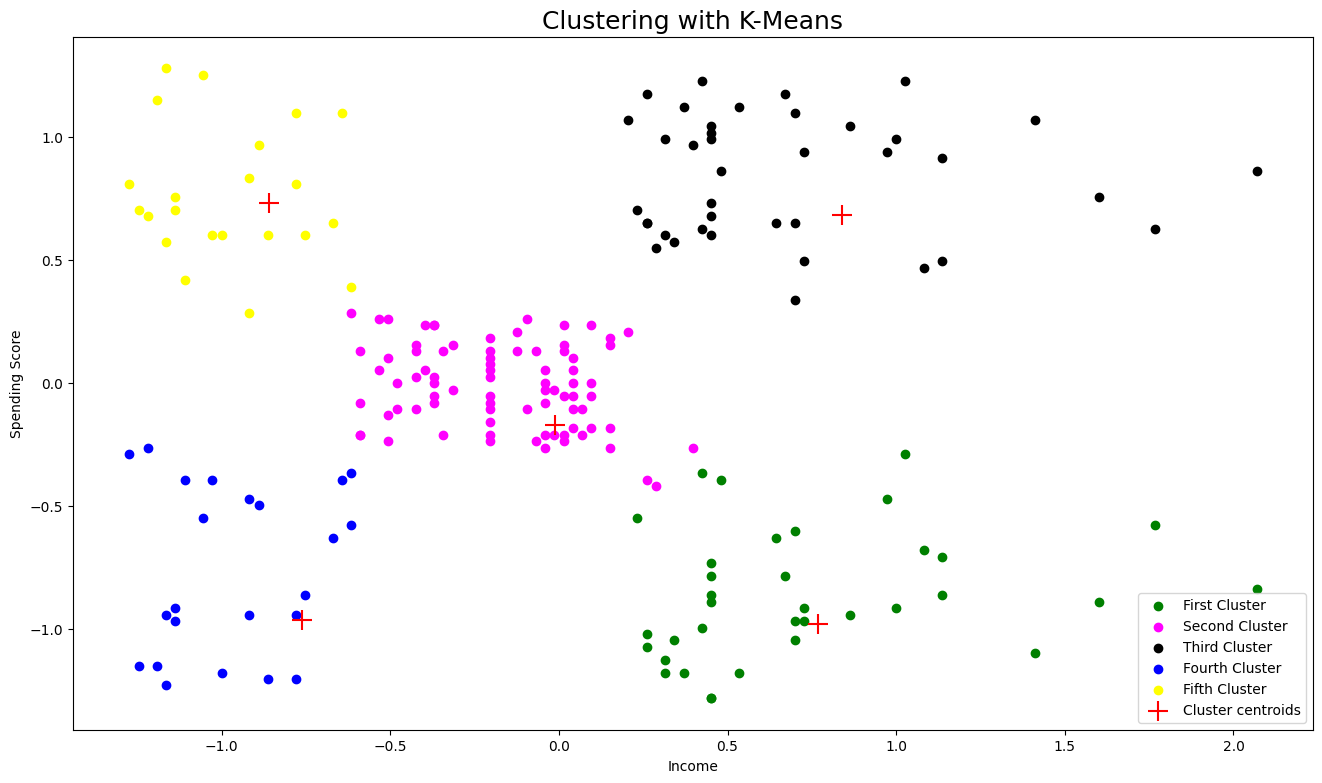

In [58]:
plt.figure(figsize=(16,9))
plt.scatter(X[clusterer_labels==0,0],X[clusterer_labels==0,1],color='green',label='First Cluster')
plt.scatter(X[clusterer_labels==1,0],X[clusterer_labels==1,1],color='magenta',label='Second Cluster')
plt.scatter(X[clusterer_labels==2,0],X[clusterer_labels==2,1],color='black',label='Third Cluster')
plt.scatter(X[clusterer_labels==3,0],X[clusterer_labels==3,1],color='blue',label='Fourth Cluster')
plt.scatter(X[clusterer_labels==4,0],X[clusterer_labels==4,1],color='yellow',label='Fifth Cluster')
plt.scatter(income_centers,spending_score_centers,color='red',s=200,marker = '+',label='Cluster centroids')

plt.title('Clustering with K-Means',loc='center',fontsize = 18)
plt.xlabel('Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

# Hierarchial Clustering

##  When we wanna cluster our datas with hierarchial clustering,There is a dendogram to show clusters.At the hierarchial clustering,for measure the distance between datas,we use Linkage function.There are 5 method:Single,Complete,Average,Group Average,Ward

### We are gonna use Ward's linkage because this idea is much in common with analysis of variance(ANOVA).The linkage function specifying the distance between two clusters is computed as the increase in the "error sum of squares" (ESS) after fusing two clusters into a single cluster. Ward´s Method seeks to choose the successive clustering steps so as to minimize the increase in ESS at each step

In [59]:
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram,linkage

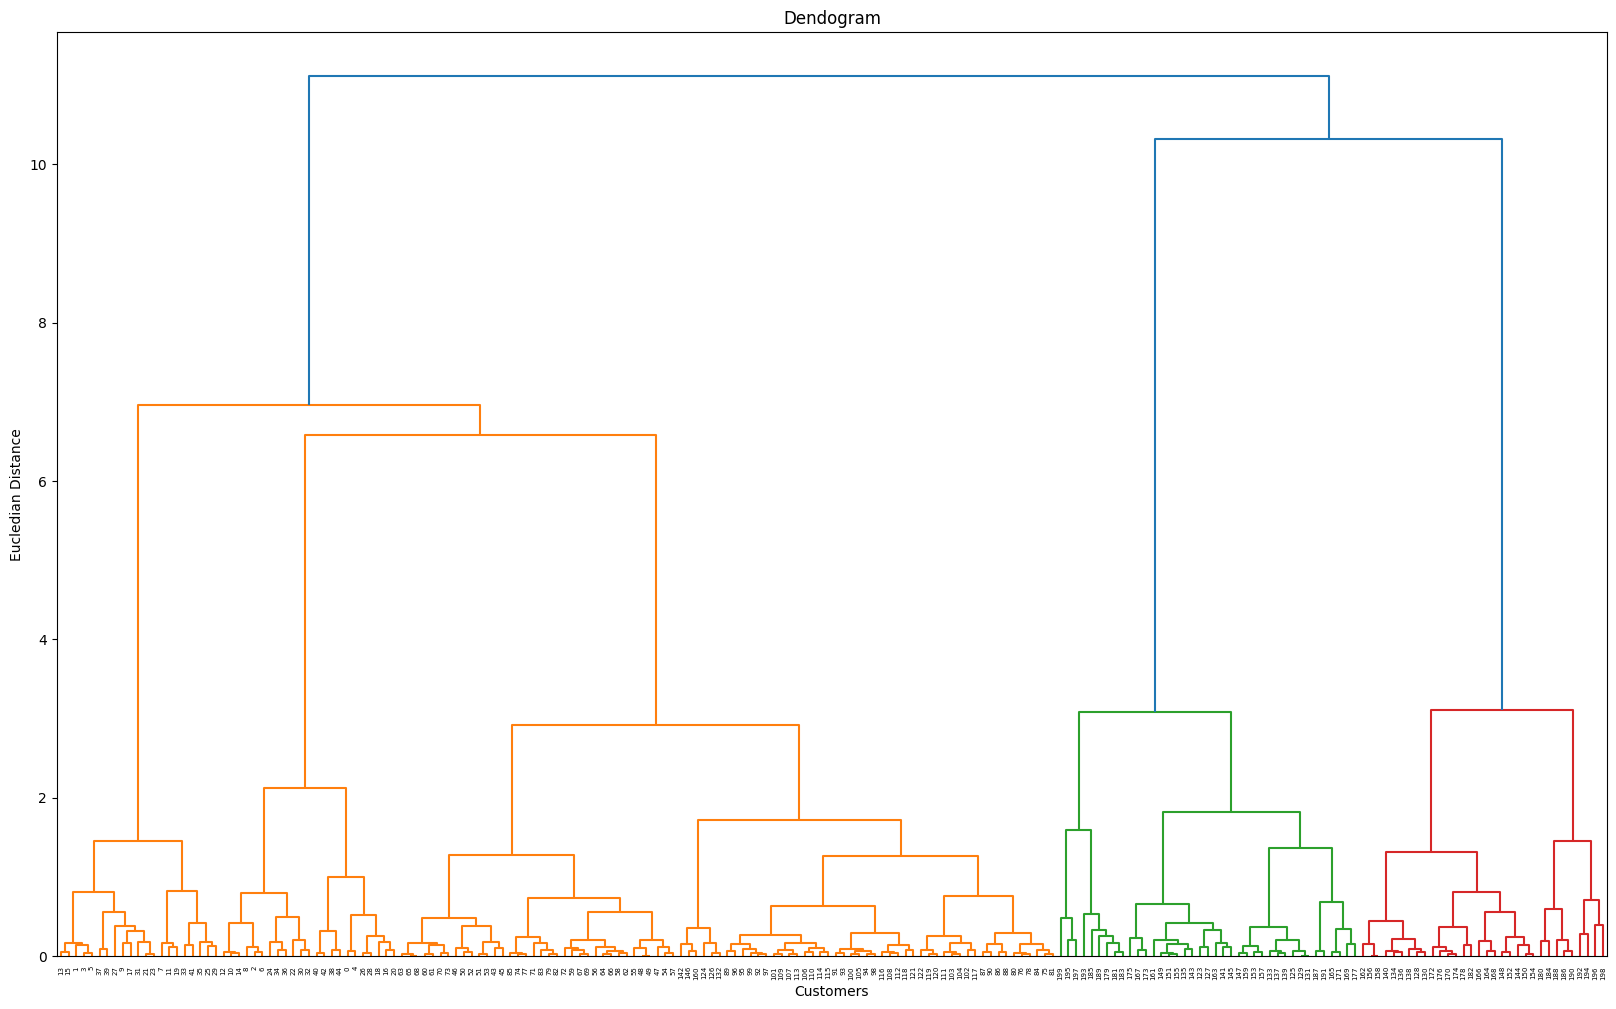

In [62]:
plt.figure(figsize=(20,12))
dendogram = sch.dendrogram(sch.linkage(X,method='ward'))
plt.title('Dendogram')
plt.ylabel('Eucledian Distance')
plt.xlabel('Customers')
plt.show()

#### We have to look at the longest vertical line which is not intercepted by a horizontal line.After we find out the longest vertical line we have to split it horizontally.All the clusters below the split will be our optimium number of clusters.In the above case 3rd line from left is the longest uninterupted line.If we were to split it with a horizontal line we will get five clusters below it.So five will be the optimium number of clusters for our dataset